<a href="https://colab.research.google.com/github/tejagandham18/Dataanalyst/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
data=pd.read_csv("/content/dataset.csv")
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
# prompt: generate a code CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

import pandas as pd

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

if duplicate_rows > 0:
    print("\nDuplicate rows:")
    print(data[data.duplicated(keep=False)])


Missing values per column:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Number of duplicate rows: 0


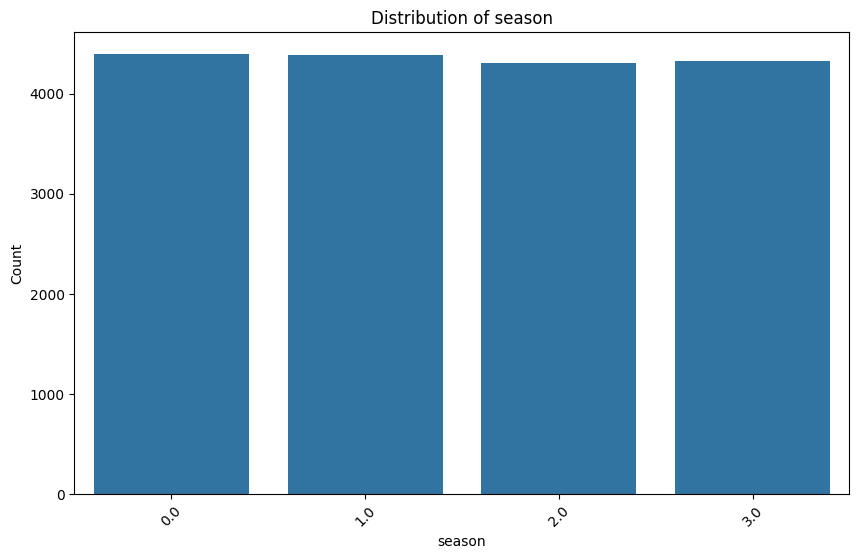

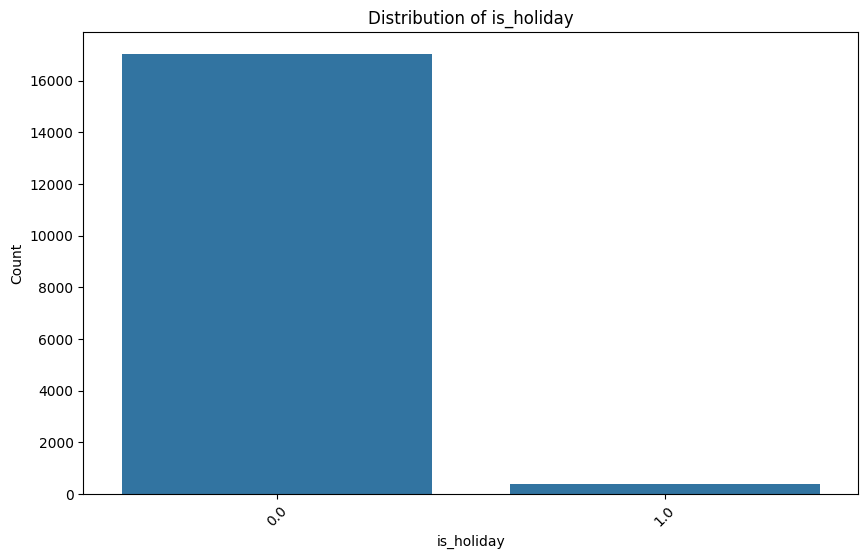

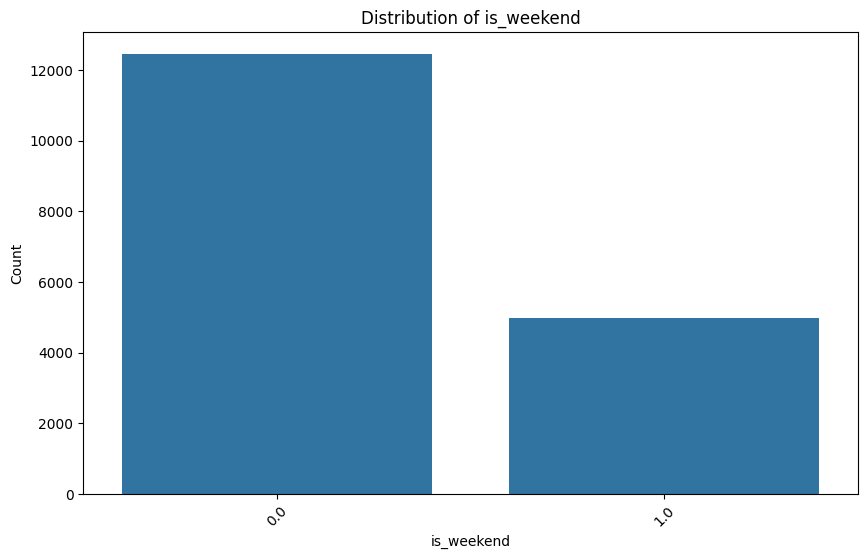

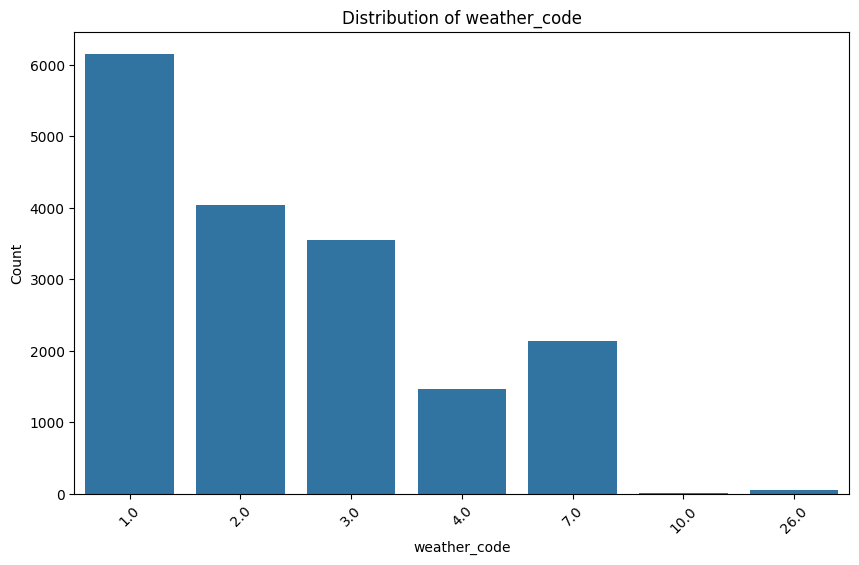

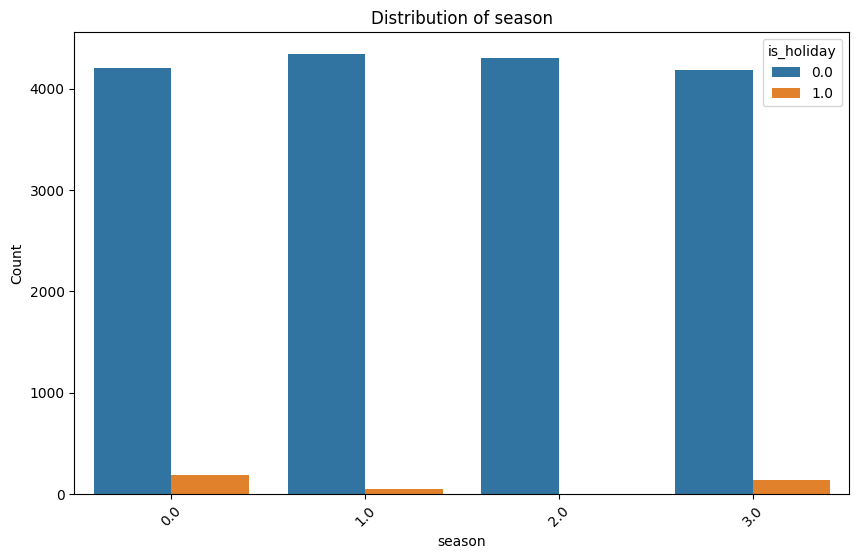

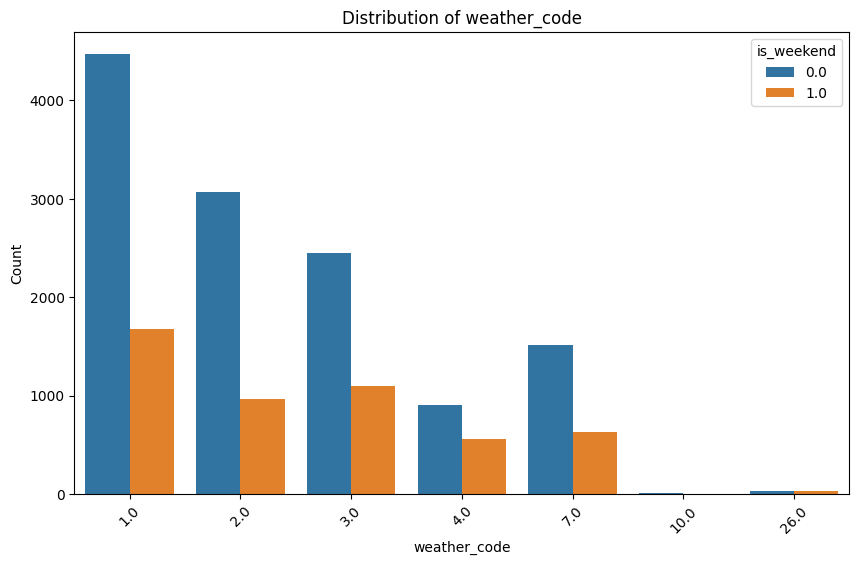

In [8]:
# prompt: generate a code for PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/is_HOLIDAY/is_WEEKEND/WEATHERCODE

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions
def plot_feature_distribution(data, feature, hue=None):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, hue=hue)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for season, is_holiday, is_weekend, weathercode
plot_feature_distribution(data, 'season')
plot_feature_distribution(data, 'is_holiday')
plot_feature_distribution(data, 'is_weekend')
plot_feature_distribution(data, 'weather_code') # Assuming 'weathercode' is actually 'weather_code'

# Plot distributions with hue (e.g., season vs. is_holiday)
plot_feature_distribution(data, 'season', hue='is_holiday')
plot_feature_distribution(data, 'weather_code', hue='is_weekend')


In [9]:
# prompt: generate code for  LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

# Convert 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Set 'timestamp' as the index
data = data.set_index('timestamp')

# Display the updated DataFrame to verify the changes
print(data.head())


                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  


In [10]:
# prompt: generate code for MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR

# Extract features from the timestamp
data['year'] = data.index.year
data['month'] = data.index.month
data['day_of_month'] = data.index.day
data['day_of_week'] = data.index.dayofweek  # Monday=0, Sunday=6
data['hour'] = data.index.hour

# Define a function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

# Apply the function to create the 'season' column
data['season'] = data['month'].apply(get_season)

# Display the updated DataFrame with the new features
print(data.head())


                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  year  month  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0  winter  2015      1   
2015-01-04 01:00:00         0.0         1.0  winter  2015      1   
2015-01-04 02:00:00         0.0         1.0  winter  2015      1   
2015-01-04 03:00:00         0.0         1.0  winter  2015      1   
2015-01-04 04:00:00         0.0         1.0  winter  2015      1   

                     day_

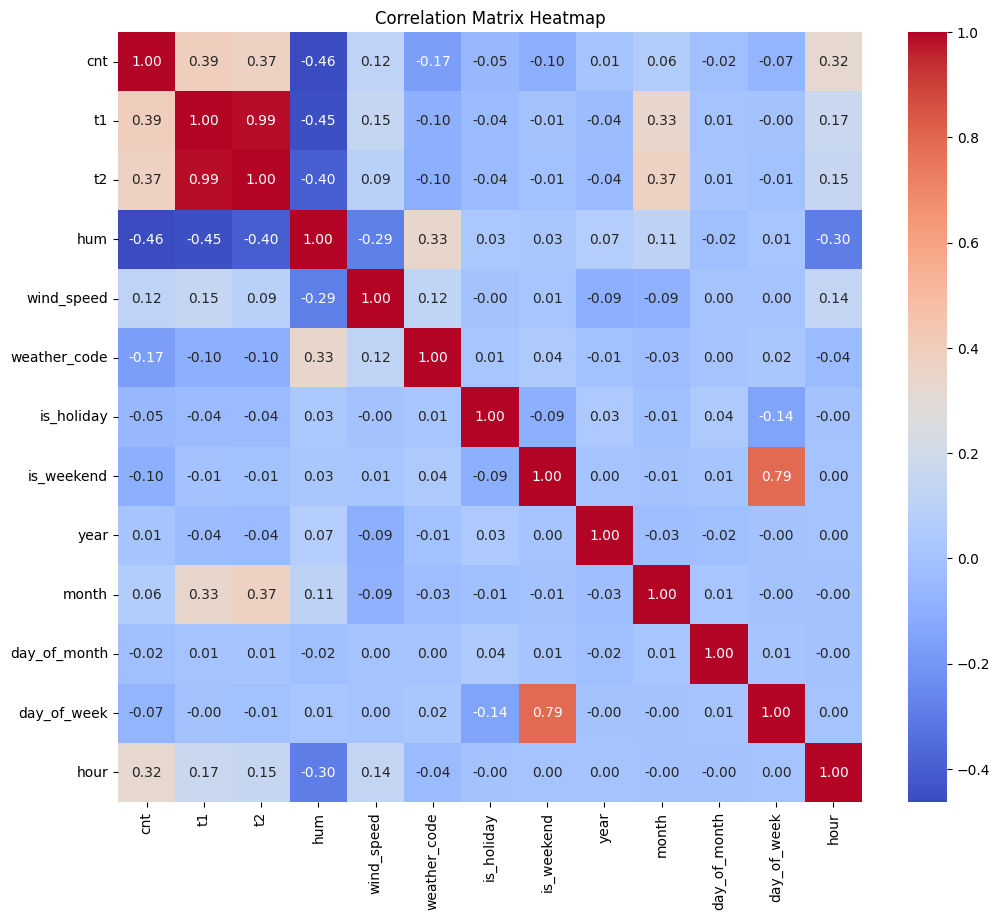

In [12]:
# prompt: generate a code for VISUALIZING THE CORRELATION WITH A HEATMAP

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas if not already imported


# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


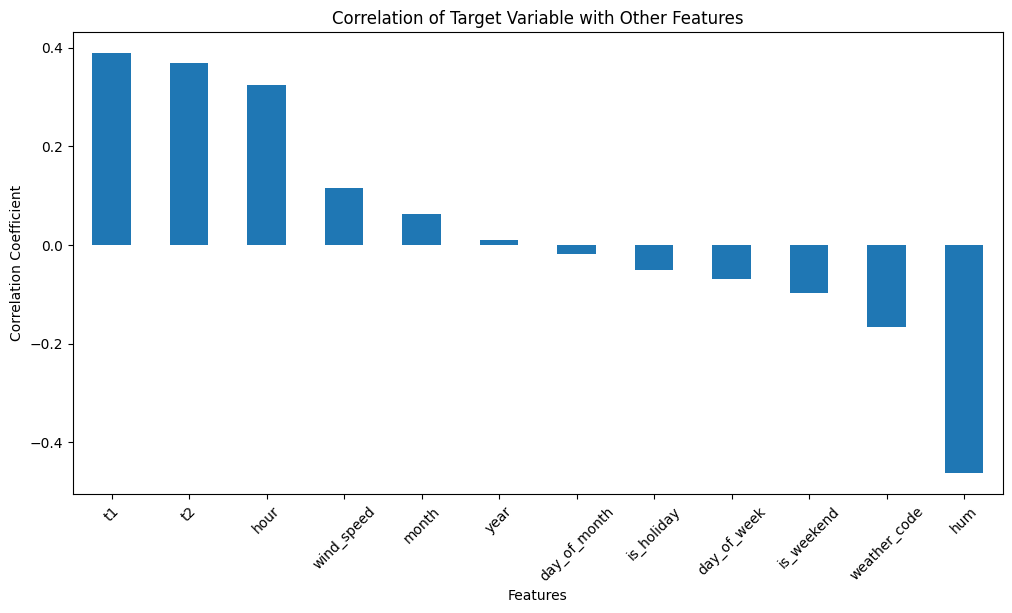

In [14]:
# prompt: generate a code for  VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cnt' is your target variable
plt.figure(figsize=(12, 6))
# Select only numeric features for correlation calculation
numeric_features = data.select_dtypes(include=['number'])
correlation_with_target = numeric_features.corr()['cnt'].sort_values(ascending=False).drop('cnt')
correlation_with_target.plot(kind='bar')
plt.title('Correlation of Target Variable with Other Features')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()



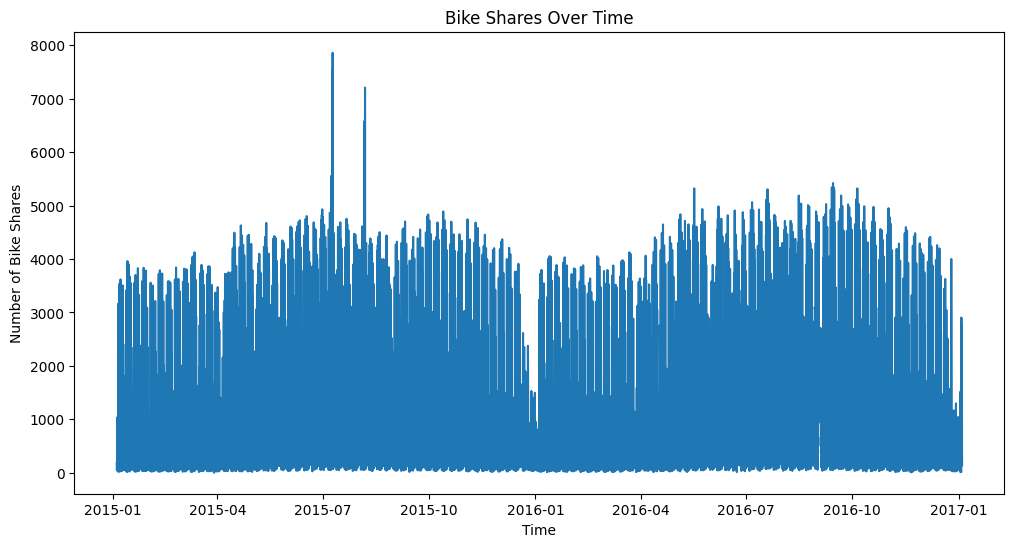

In [15]:
# prompt: generate a code for PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

# Assuming 'cnt' represents the number of bike shares
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['cnt'])
plt.xlabel('Time')
plt.ylabel('Number of Bike Shares')
plt.title('Bike Shares Over Time')
plt.show()


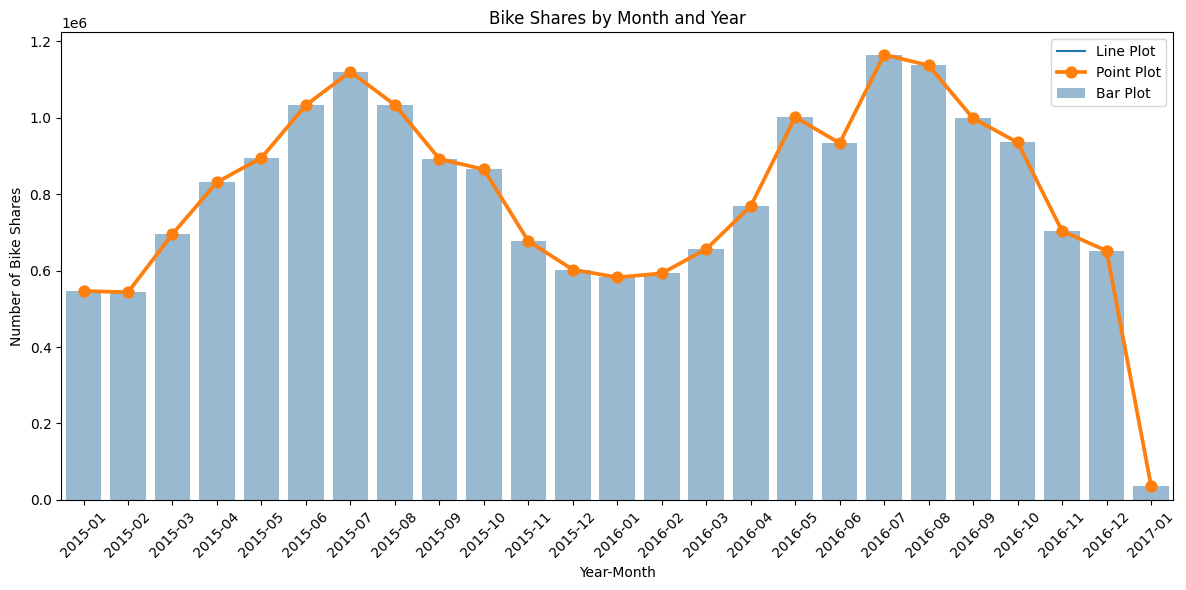

In [17]:
# prompt: generate a code for PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

# prompt: generate a code for PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

# Group data by month and year
data['year_month'] = data.index.to_period('M')
monthly_data = data.groupby('year_month')['cnt'].sum().reset_index()

# Convert 'year_month' to string for plotting
monthly_data['year_month'] = monthly_data['year_month'].astype(str) # Convert to string

# Plotting bike shares by month and year
plt.figure(figsize=(12, 6))

# Line plot
sns.lineplot(x='year_month', y='cnt', data=monthly_data, label='Line Plot')

# Point plot
sns.pointplot(x='year_month', y='cnt', data=monthly_data, label='Point Plot')

# Bar plot
sns.barplot(x='year_month', y='cnt', data=monthly_data, label='Bar Plot', alpha = 0.5) #alpha for transparency

plt.xlabel('Year-Month')
plt.ylabel('Number of Bike Shares')
plt.title('Bike Shares by Month and Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

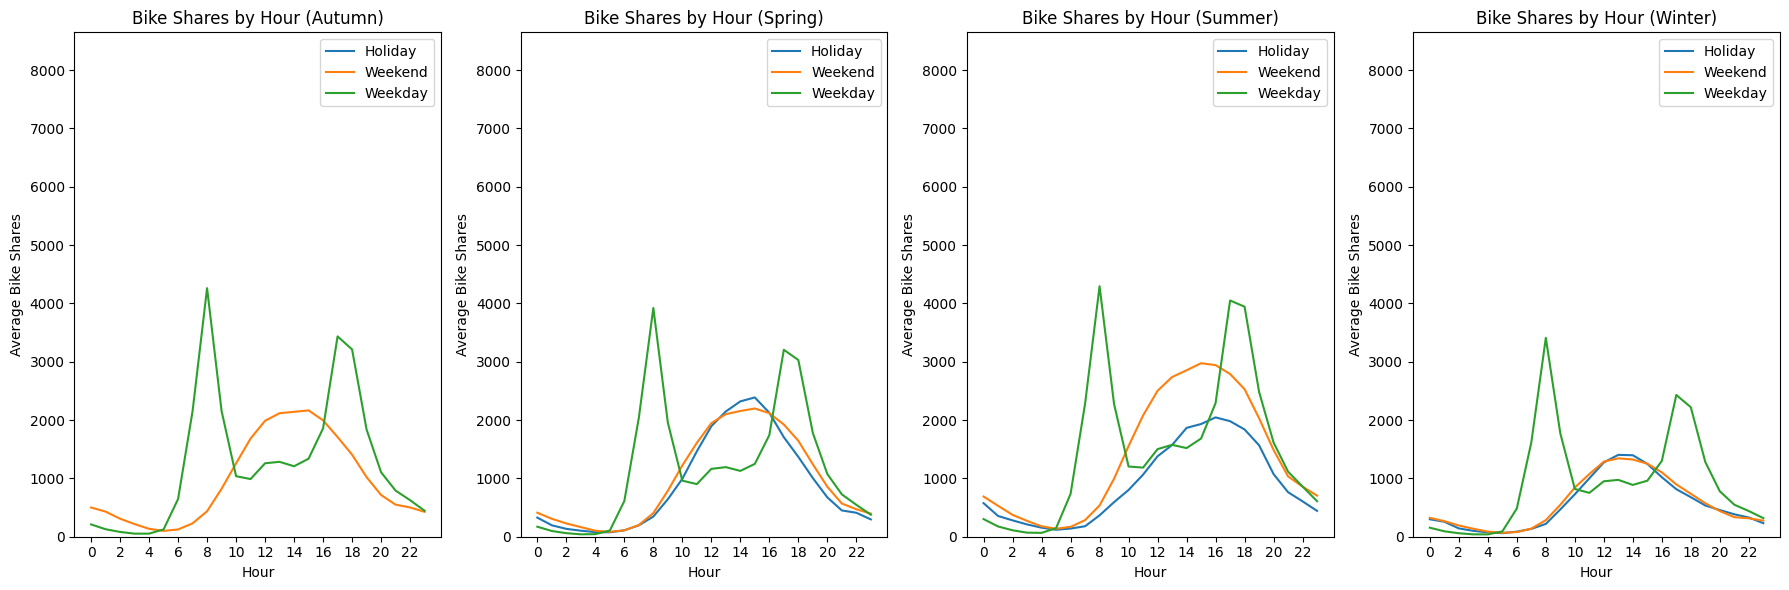

In [18]:
# prompt: generate code for PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

# Group data by hour, season, is_holiday, and is_weekend, then calculate the mean bike shares
hourly_bike_shares = data.groupby(['hour', 'season', 'is_holiday', 'is_weekend'])['cnt'].mean().reset_index()

# Plotting bike shares by hour for each category
plt.figure(figsize=(18, 6))

# Create subplots for each season
for season in hourly_bike_shares['season'].unique():
    plt.subplot(1, 4, list(hourly_bike_shares['season'].unique()).index(season)+1)

    season_data = hourly_bike_shares[hourly_bike_shares['season'] == season]

    # Plotting for holidays
    sns.lineplot(x='hour', y='cnt', data=season_data[season_data['is_holiday'] == 1], label='Holiday')

    # Plotting for weekends
    sns.lineplot(x='hour', y='cnt', data=season_data[season_data['is_weekend'] == 1], label='Weekend')

    # Plotting for weekdays (neither holiday nor weekend)
    sns.lineplot(x='hour', y='cnt', data=season_data[(season_data['is_holiday'] == 0) & (season_data['is_weekend'] == 0)], label='Weekday')


    plt.title(f'Bike Shares by Hour ({season.capitalize()})')
    plt.xlabel('Hour')
    plt.ylabel('Average Bike Shares')
    plt.legend()
    plt.ylim(0, data['cnt'].max() * 1.1)  # Adjust the y-axis limit for better visualization
    plt.xticks(range(0, 24, 2)) # Show every 2 hours

plt.tight_layout()
plt.show()


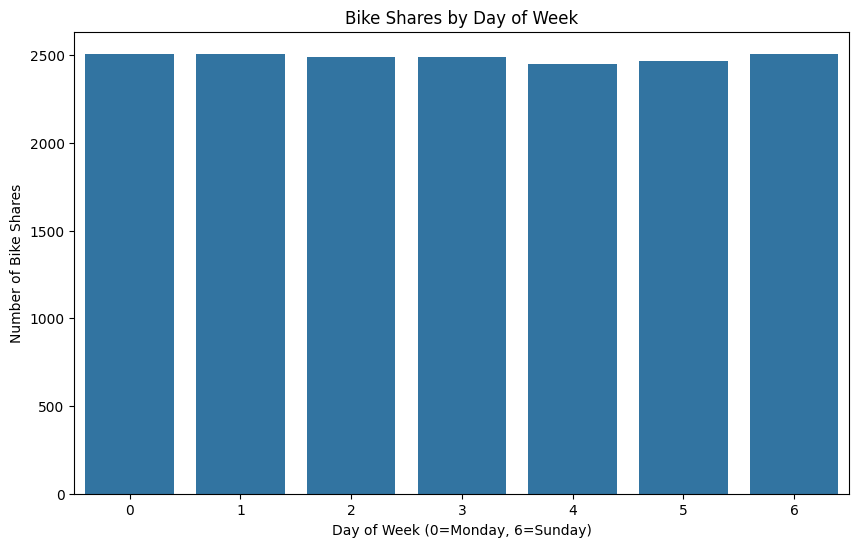

In [19]:
# prompt: generate a code for PLOTTING BIKE SHARES BY DAY OF WEEK

# Plotting bike shares by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=data)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Bike Shares')
plt.title('Bike Shares by Day of Week')
plt.show()


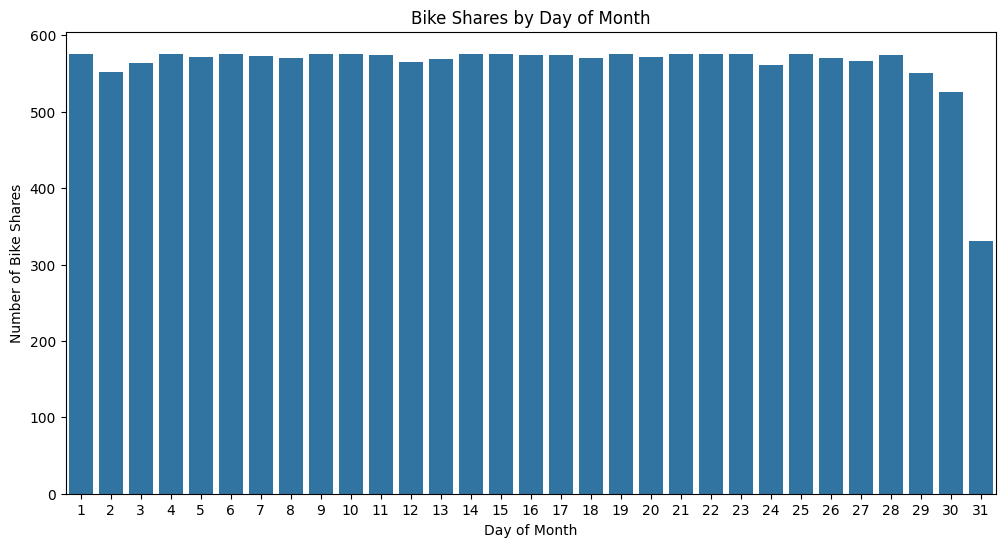

In [20]:
# prompt: generate a code for PLOTTING BIKE SHARES BY DAY OF MONTH

# Plotting bike shares by day of month
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_month', data=data)
plt.xlabel('Day of Month')
plt.ylabel('Number of Bike Shares')
plt.title('Bike Shares by Day of Month')
plt.show()


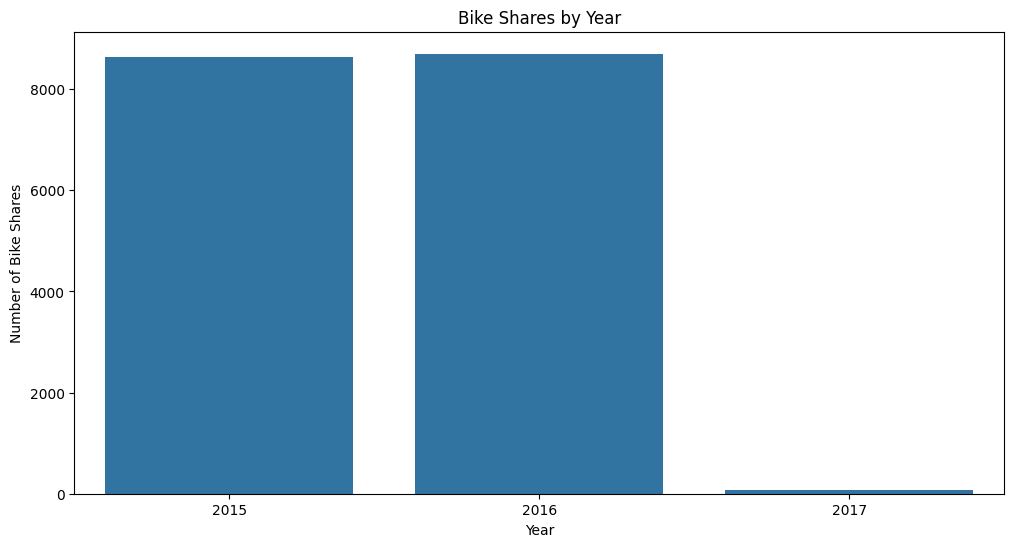

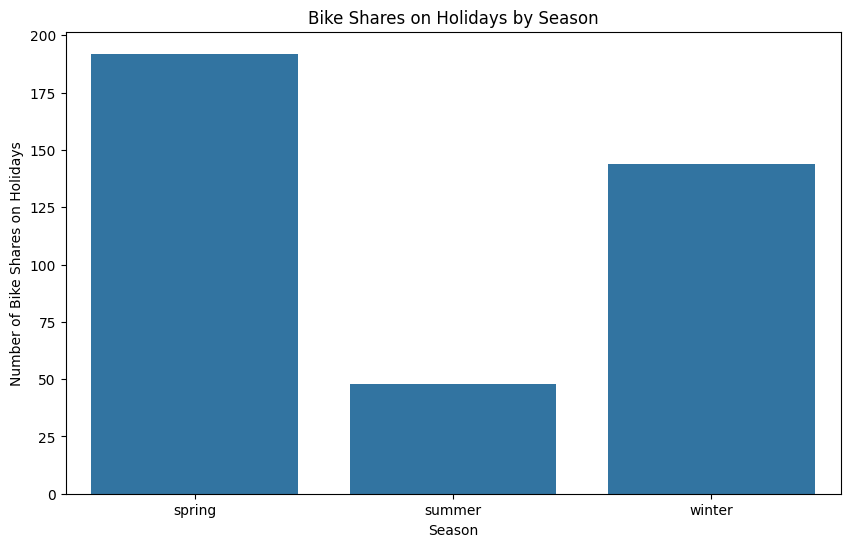

In [21]:
# prompt: generate a code for  PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

# Plotting bike shares by year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=data)
plt.xlabel('Year')
plt.ylabel('Number of Bike Shares')
plt.title('Bike Shares by Year')
plt.show()


# Plotting bike shares on holidays by season
holiday_data = data[data['is_holiday'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=holiday_data)
plt.xlabel('Season')
plt.ylabel('Number of Bike Shares on Holidays')
plt.title('Bike Shares on Holidays by Season')
plt.show()


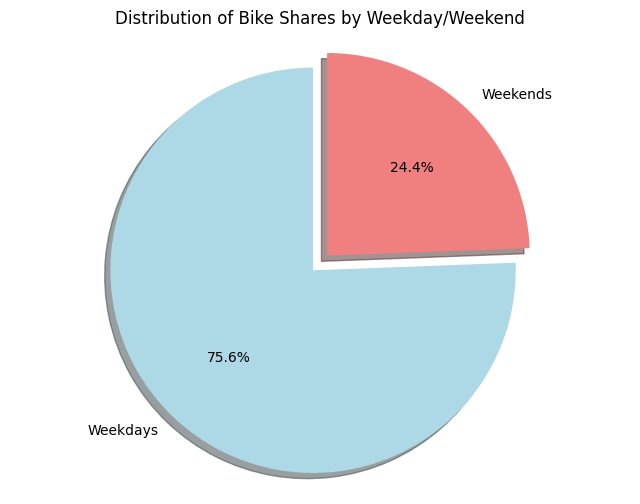

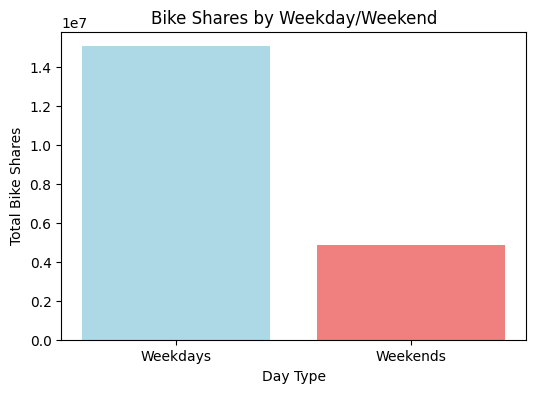

In [22]:
# prompt: generate a code for VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

import matplotlib.pyplot as plt

# Calculate the total bike shares for weekdays and weekends
weekday_shares = data[data['is_weekend'] == 0]['cnt'].sum()
weekend_shares = data[data['is_weekend'] == 1]['cnt'].sum()

# Create a pie chart
labels = ['Weekdays', 'Weekends']
sizes = [weekday_shares, weekend_shares]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the weekday slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color=colors)
plt.title('Bike Shares by Weekday/Weekend')
plt.xlabel('Day Type')
plt.ylabel('Total Bike Shares')
plt.show()


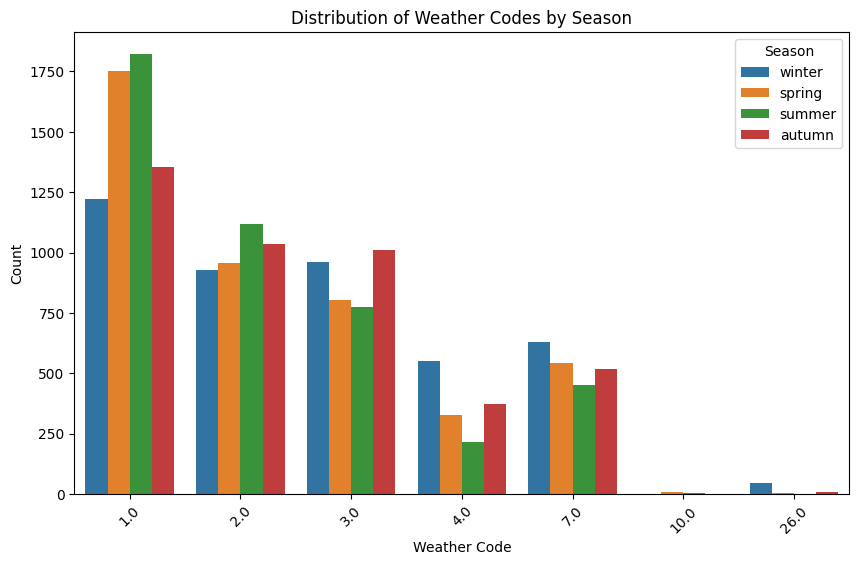

In [23]:
# prompt: generate acode for  PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the provided code

# Plot the distribution of weather codes by season
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_code', data=data, hue='season')
plt.title('Distribution of Weather Codes by Season')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()
